## Final evaluations

Using train.py script from comparisons directory we run evaluations on 1st dataset we got next results:

In [15]:
import numpy as np
import pandas as pd

In [16]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

In [17]:
def restyle_dataframe(df):
    df = df.style.apply(highlight_max, props='color:white;background-color:green', axis=0, subset=['f1', 'accuracy', 'precision', 'recall'])
    df = df.apply(highlight_min, props='color:white;background-color:green', axis=0, subset=['time-1sample'])
    return df

In [25]:
restyle_dataframe(
    pd
    .read_json('preprocessed-dataset-final-results.json')
    .T
    .sort_values(by='f1', ascending=True)
    .drop(columns=['classification-report'])
)

<Figure size 640x480 with 0 Axes>

On small subset of SCC we got next results:

In [19]:
restyle_dataframe(
    pd
    .read_json('scc-smol-final-results.json')
    .T
    .sort_values(by='f1', ascending=False)
    .drop(columns='classification-report')
)

On full SCC dataset we got next results for `roberta-base` and `microsoft/graphcodebert-base`, `microsoft/graphcodebert-base`

Link: https://api.wandb.ai/links/kostya-klol71/ccfzwjix

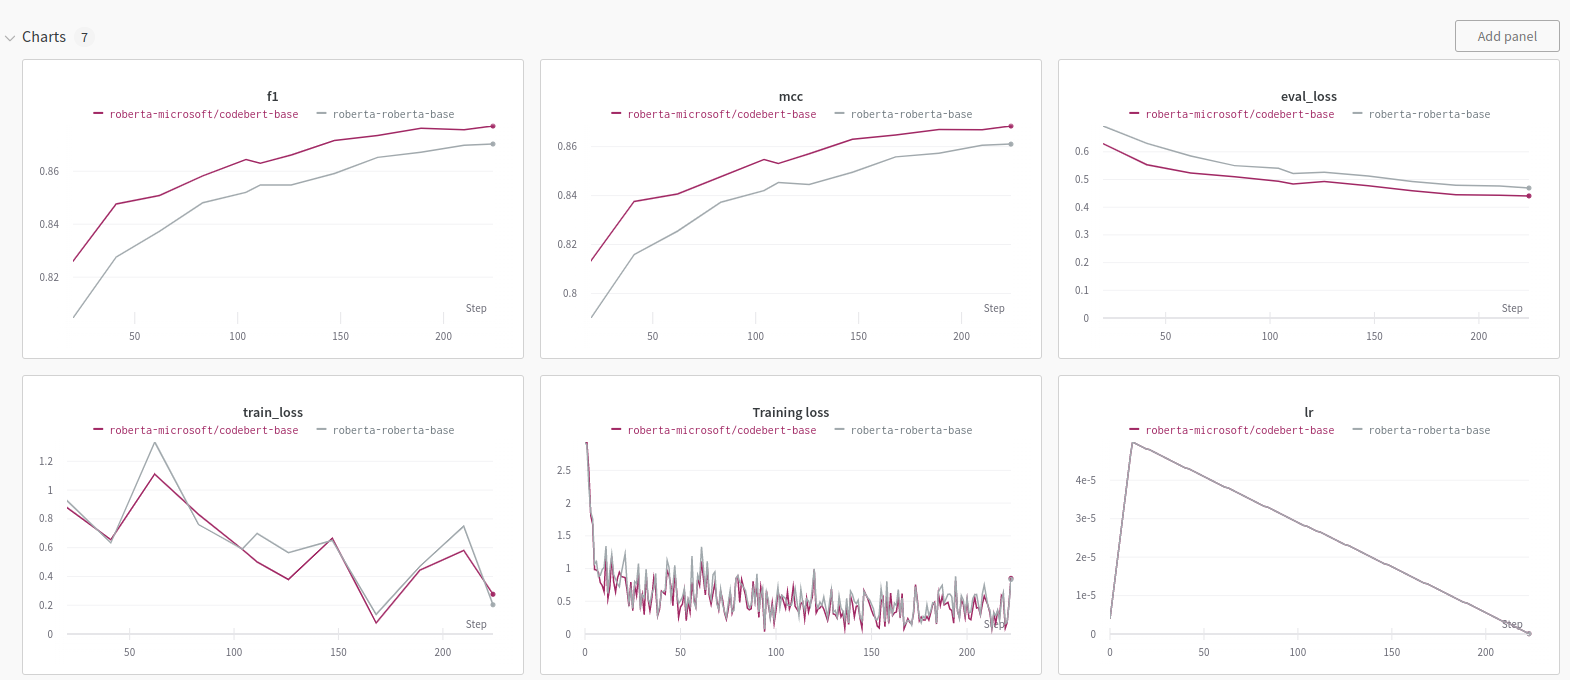

Codebert:

Roberta:

In [11]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import joblib

train = pd.read_json('../notebooks/train-code25.json')
test = pd.read_json('../notebooks/test-code25.json')
X_test, y_test = test['code'], test['language']

le = LabelEncoder()
y_train_labeled = le.fit_transform(train['language'])
y_test_labeled = le.transform(y_test)

preds_codebert = joblib.load('../comparisons/codebert-predictions.joblib')
preds_roberta = joblib.load('../comparisons/roberta-predictions.joblib')
preds_graphcodebert = joblib.load('../comparisons/graphcodebert-predictions.joblib')
preds_codeberta = joblib.load('../comparisons/coderoberta-predictions.joblib')

In [3]:
print(classification_report(y_test, le.inverse_transform(preds_codebert[0]), digits=3))

              precision    recall  f1-score   support

        bash      0.857     0.881     0.869      2360
           c      0.822     0.839     0.830      2396
     c_sharp      0.832     0.844     0.838      2421
         cpp      0.842     0.810     0.826      2418
         css      0.882     0.892     0.887      2425
     haskell      0.967     0.937     0.952      2441
        java      0.837     0.885     0.860      2453
  javascript      0.808     0.818     0.813      2357
         lua      0.947     0.899     0.922      1678
        objc      0.906     0.934     0.920      2465
        perl      0.856     0.850     0.853      2432
         php      0.828     0.848     0.838      2306
      python      0.859     0.864     0.861      2376
           r      0.934     0.930     0.932      2359
        ruby      0.889     0.884     0.887      2409
       scala      0.954     0.926     0.940      2318
      sqlite      0.841     0.885     0.863      2375
       swift      0.974    

In [4]:
print(classification_report(y_test, le.inverse_transform(preds_graphcodebert[0]), digits=3))

              precision    recall  f1-score   support

        bash      0.855     0.888     0.871      2360
           c      0.823     0.851     0.837      2396
     c_sharp      0.831     0.849     0.840      2421
         cpp      0.853     0.825     0.839      2418
         css      0.883     0.894     0.888      2425
     haskell      0.960     0.941     0.950      2441
        java      0.841     0.881     0.860      2453
  javascript      0.814     0.824     0.819      2357
         lua      0.946     0.900     0.923      1678
        objc      0.909     0.936     0.922      2465
        perl      0.864     0.858     0.861      2432
         php      0.835     0.845     0.840      2306
      python      0.858     0.869     0.864      2376
           r      0.946     0.936     0.941      2359
        ruby      0.901     0.880     0.891      2409
       scala      0.966     0.924     0.944      2318
      sqlite      0.849     0.883     0.866      2375
       swift      0.974    

In [5]:
print(classification_report(y_test, le.inverse_transform(preds_roberta[0]), digits=3))

              precision    recall  f1-score   support

        bash      0.856     0.868     0.862      2360
           c      0.809     0.842     0.826      2396
     c_sharp      0.816     0.842     0.829      2421
         cpp      0.832     0.806     0.819      2418
         css      0.874     0.886     0.880      2425
     haskell      0.945     0.934     0.939      2441
        java      0.837     0.873     0.854      2453
  javascript      0.804     0.804     0.804      2357
         lua      0.942     0.894     0.917      1678
        objc      0.889     0.934     0.911      2465
        perl      0.846     0.852     0.849      2432
         php      0.811     0.827     0.819      2306
      python      0.852     0.848     0.850      2376
           r      0.928     0.924     0.926      2359
        ruby      0.887     0.873     0.880      2409
       scala      0.967     0.913     0.939      2318
      sqlite      0.834     0.881     0.857      2375
       swift      0.977    

In [14]:
print(classification_report(y_test, le.inverse_transform(preds_codeberta[0]), digits=3))

              precision    recall  f1-score   support

        bash      0.831     0.890     0.859      2360
           c      0.802     0.854     0.827      2396
     c_sharp      0.831     0.846     0.838      2421
         cpp      0.853     0.804     0.828      2418
         css      0.897     0.885     0.891      2425
     haskell      0.959     0.934     0.946      2441
        java      0.849     0.876     0.862      2453
  javascript      0.807     0.827     0.817      2357
         lua      0.942     0.897     0.919      1678
        objc      0.916     0.926     0.921      2465
        perl      0.869     0.859     0.864      2432
         php      0.842     0.840     0.841      2306
      python      0.867     0.859     0.863      2376
           r      0.935     0.926     0.930      2359
        ruby      0.888     0.880     0.884      2409
       scala      0.948     0.923     0.936      2318
      sqlite      0.838     0.888     0.862      2375
       swift      0.965    

In [12]:
confmat_codebert = confusion_matrix(y_test, le.inverse_transform(preds_codebert[0]))
confmat_roberta = confusion_matrix(y_test, le.inverse_transform(preds_roberta[0]))
confmat_graphcodebert = confusion_matrix(y_test, le.inverse_transform(preds_graphcodebert[0]))
confmat_codeberta = confusion_matrix(y_test, le.inverse_transform(preds_codeberta[0]))

In [10]:
import seaborn as sns

def plot_confmat(confmat, title):
    # Change figure size and increase dpi for better resolution
    plt.rcParams['figure.figsize'] = (20, 20)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)

    ax = sns.heatmap(confmat, annot=True, fmt='d', cmap="OrRd")

    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(le.classes_)

    # set y-axis label and ticks
    ax.set_ylabel("Actual Class", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(le.classes_)

    # set plot title
    ax.set_title(title, fontsize=14, pad=20)

    plt.show()

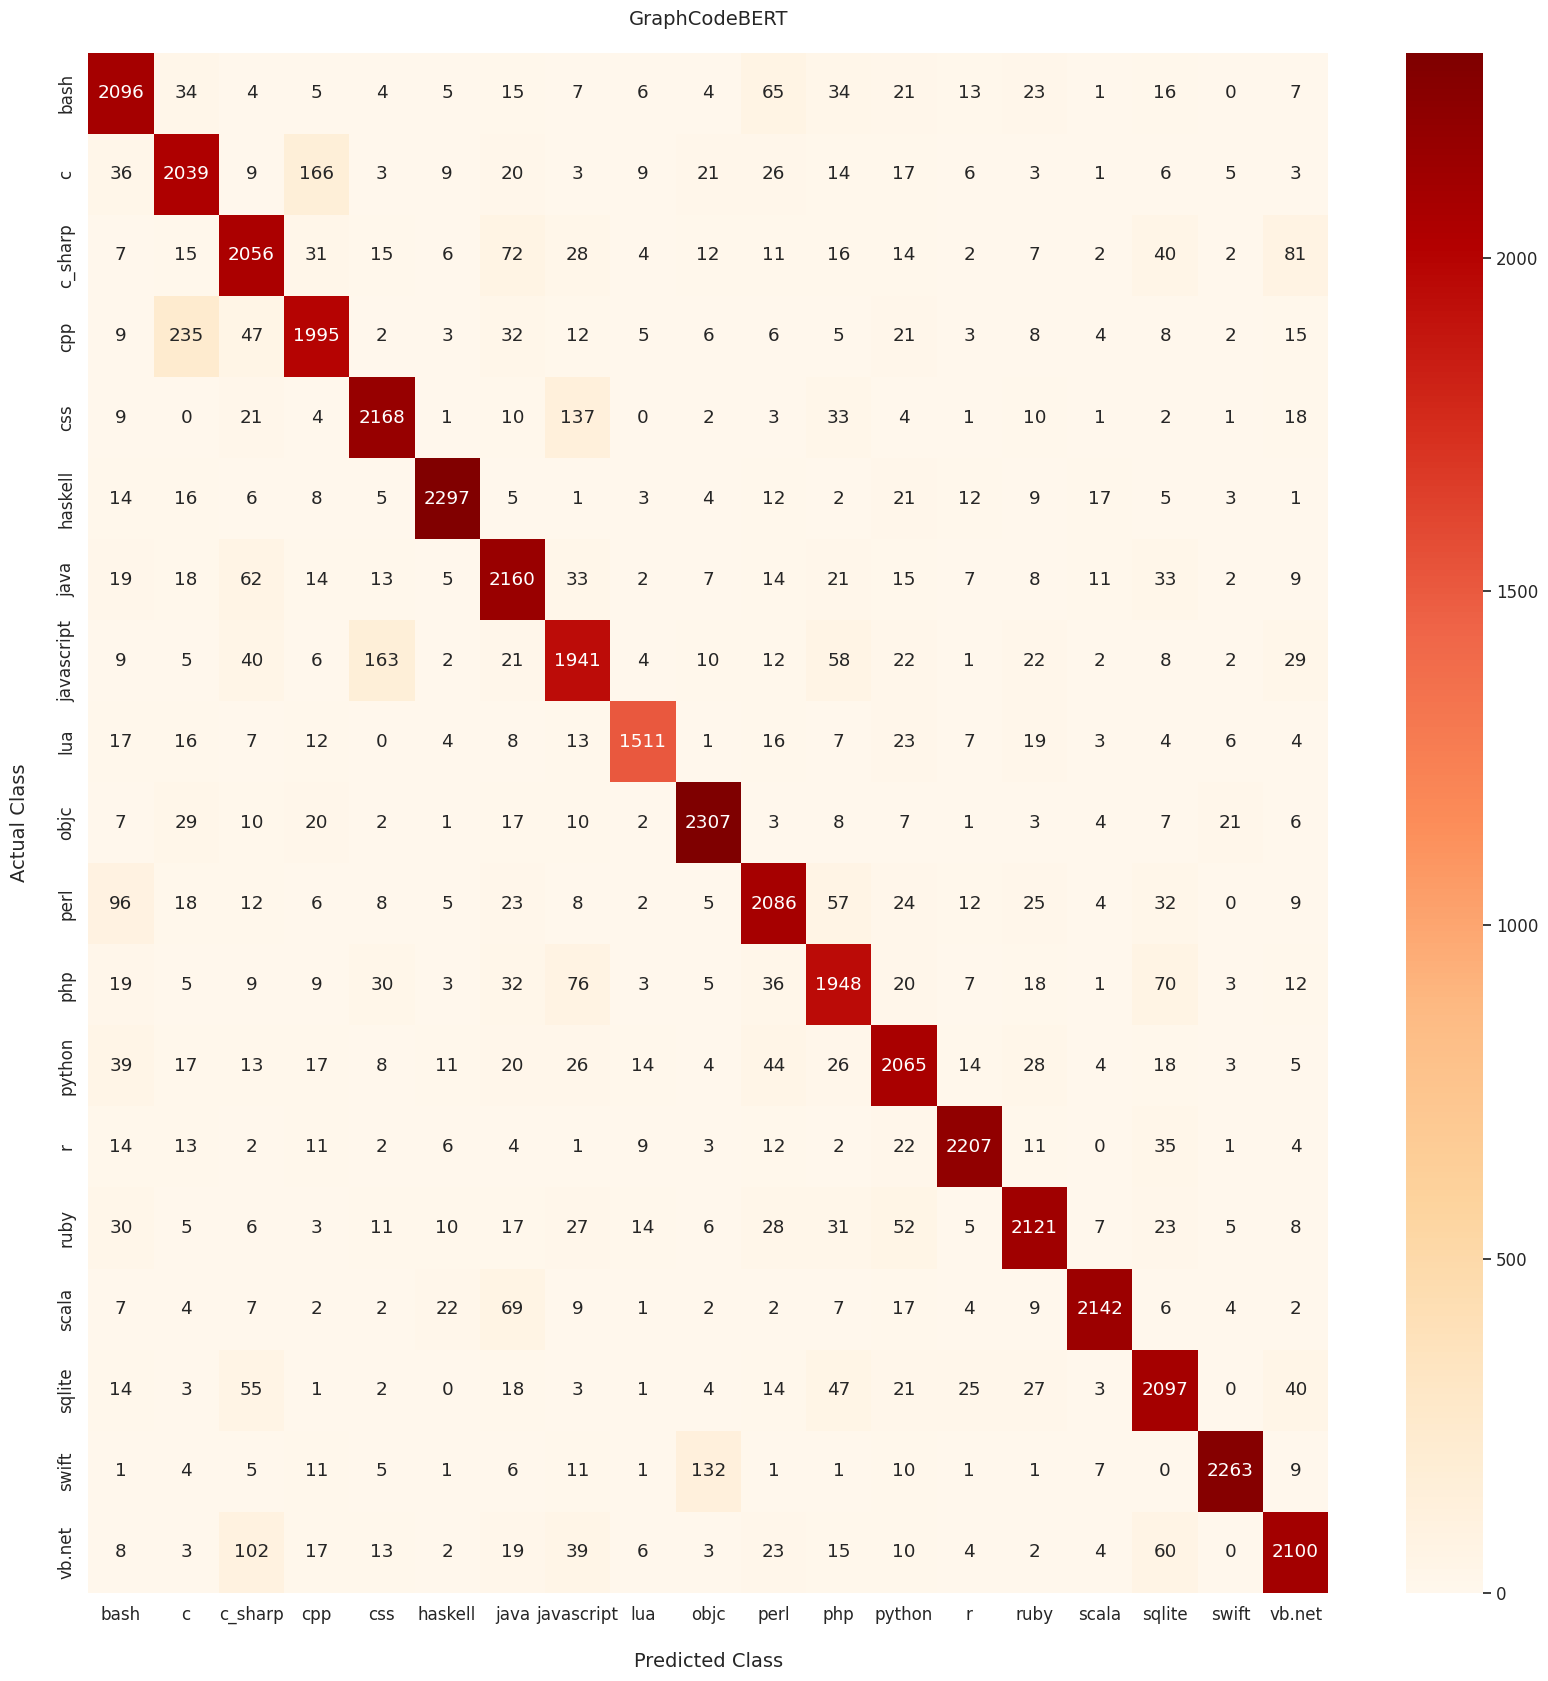

In [9]:
plot_confmat(confmat_graphcodebert, 'GraphCodeBERT')

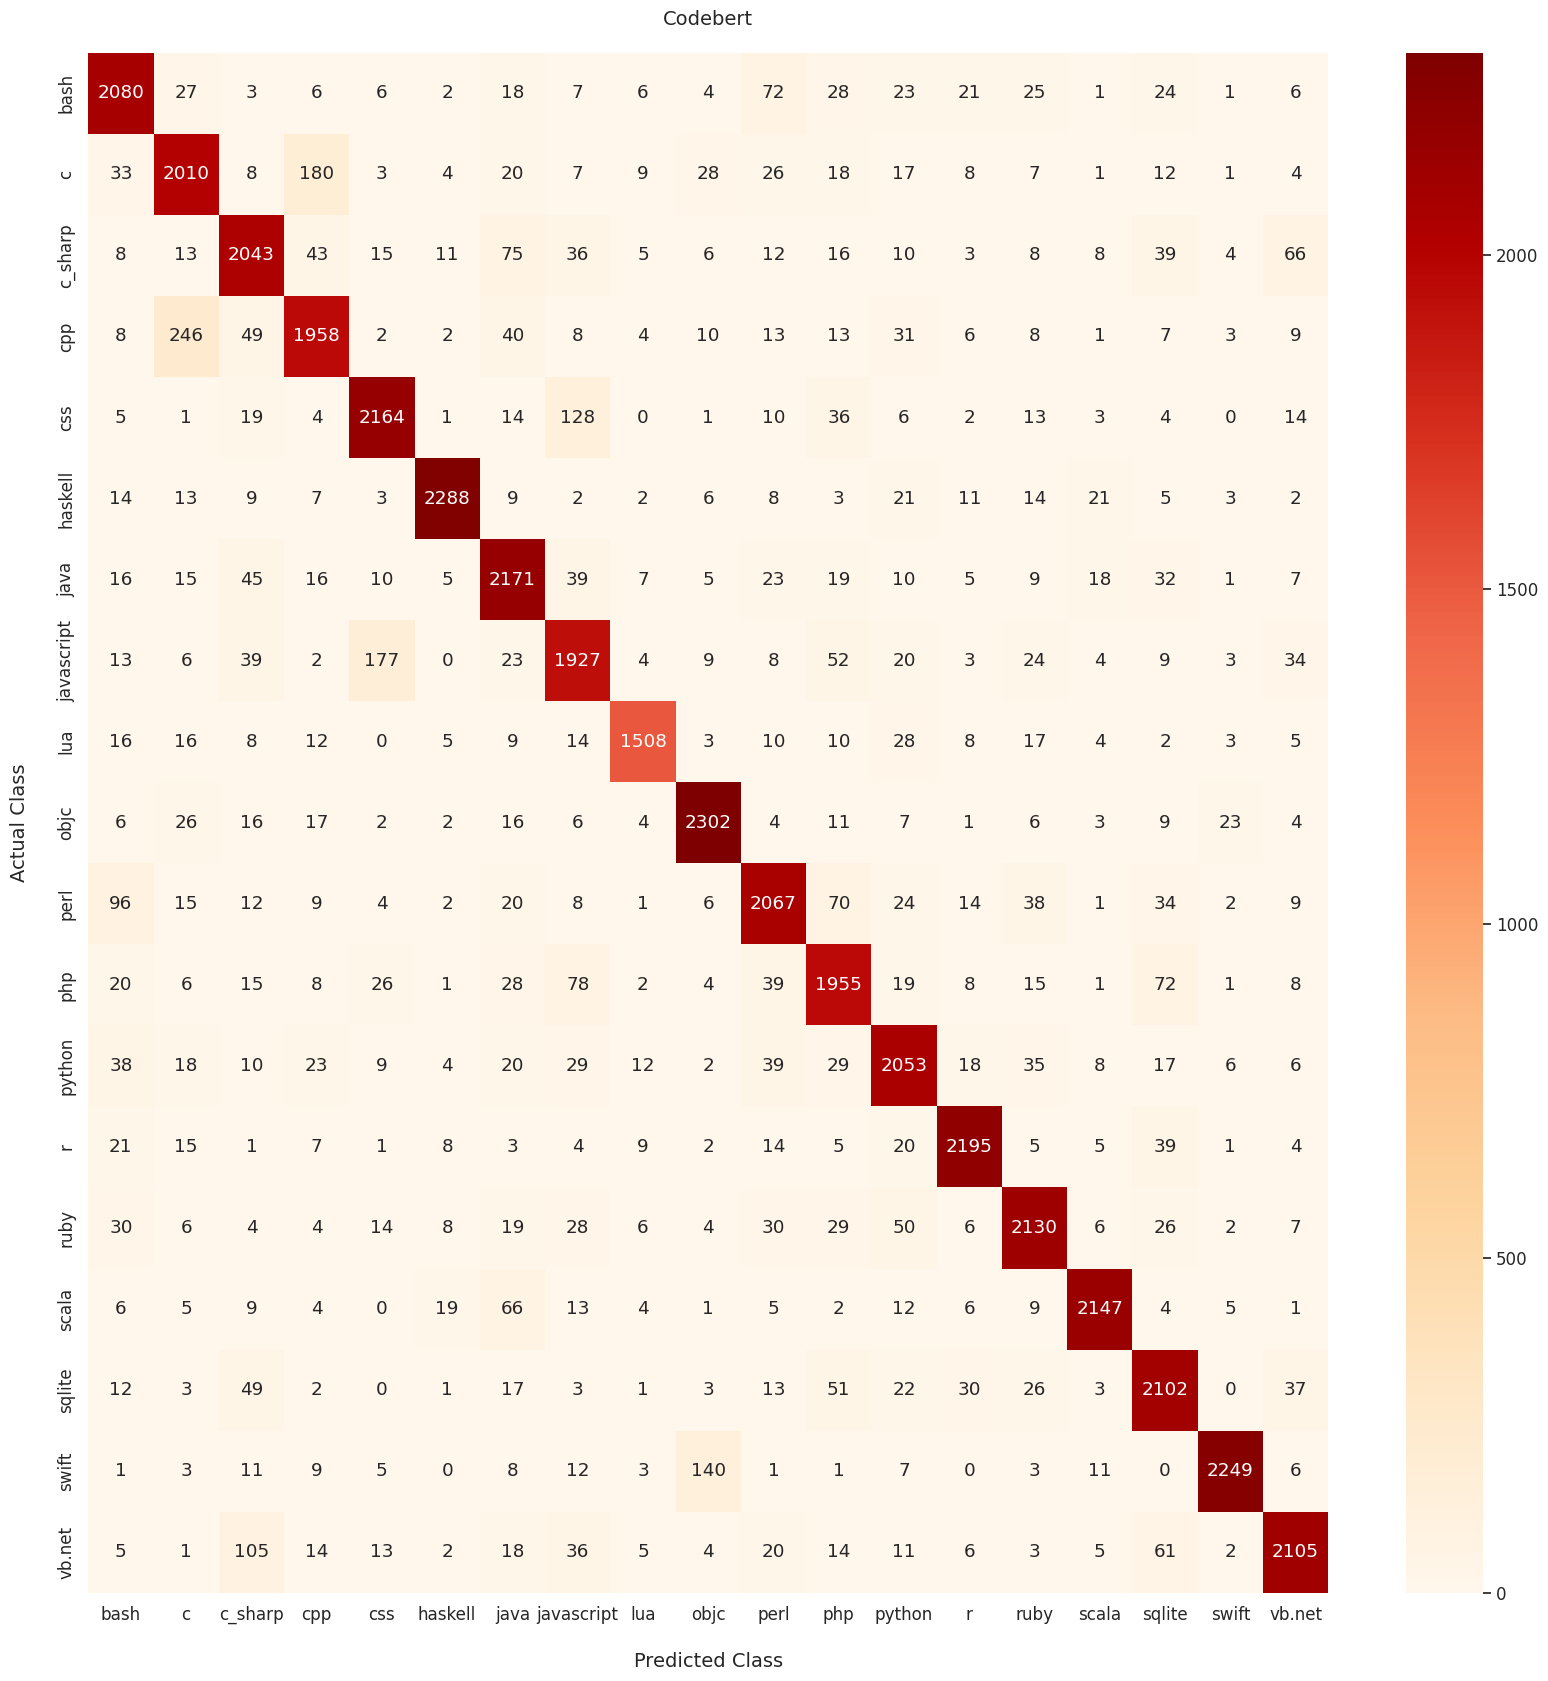

In [10]:
plot_confmat(confmat_codebert, 'Codebert')

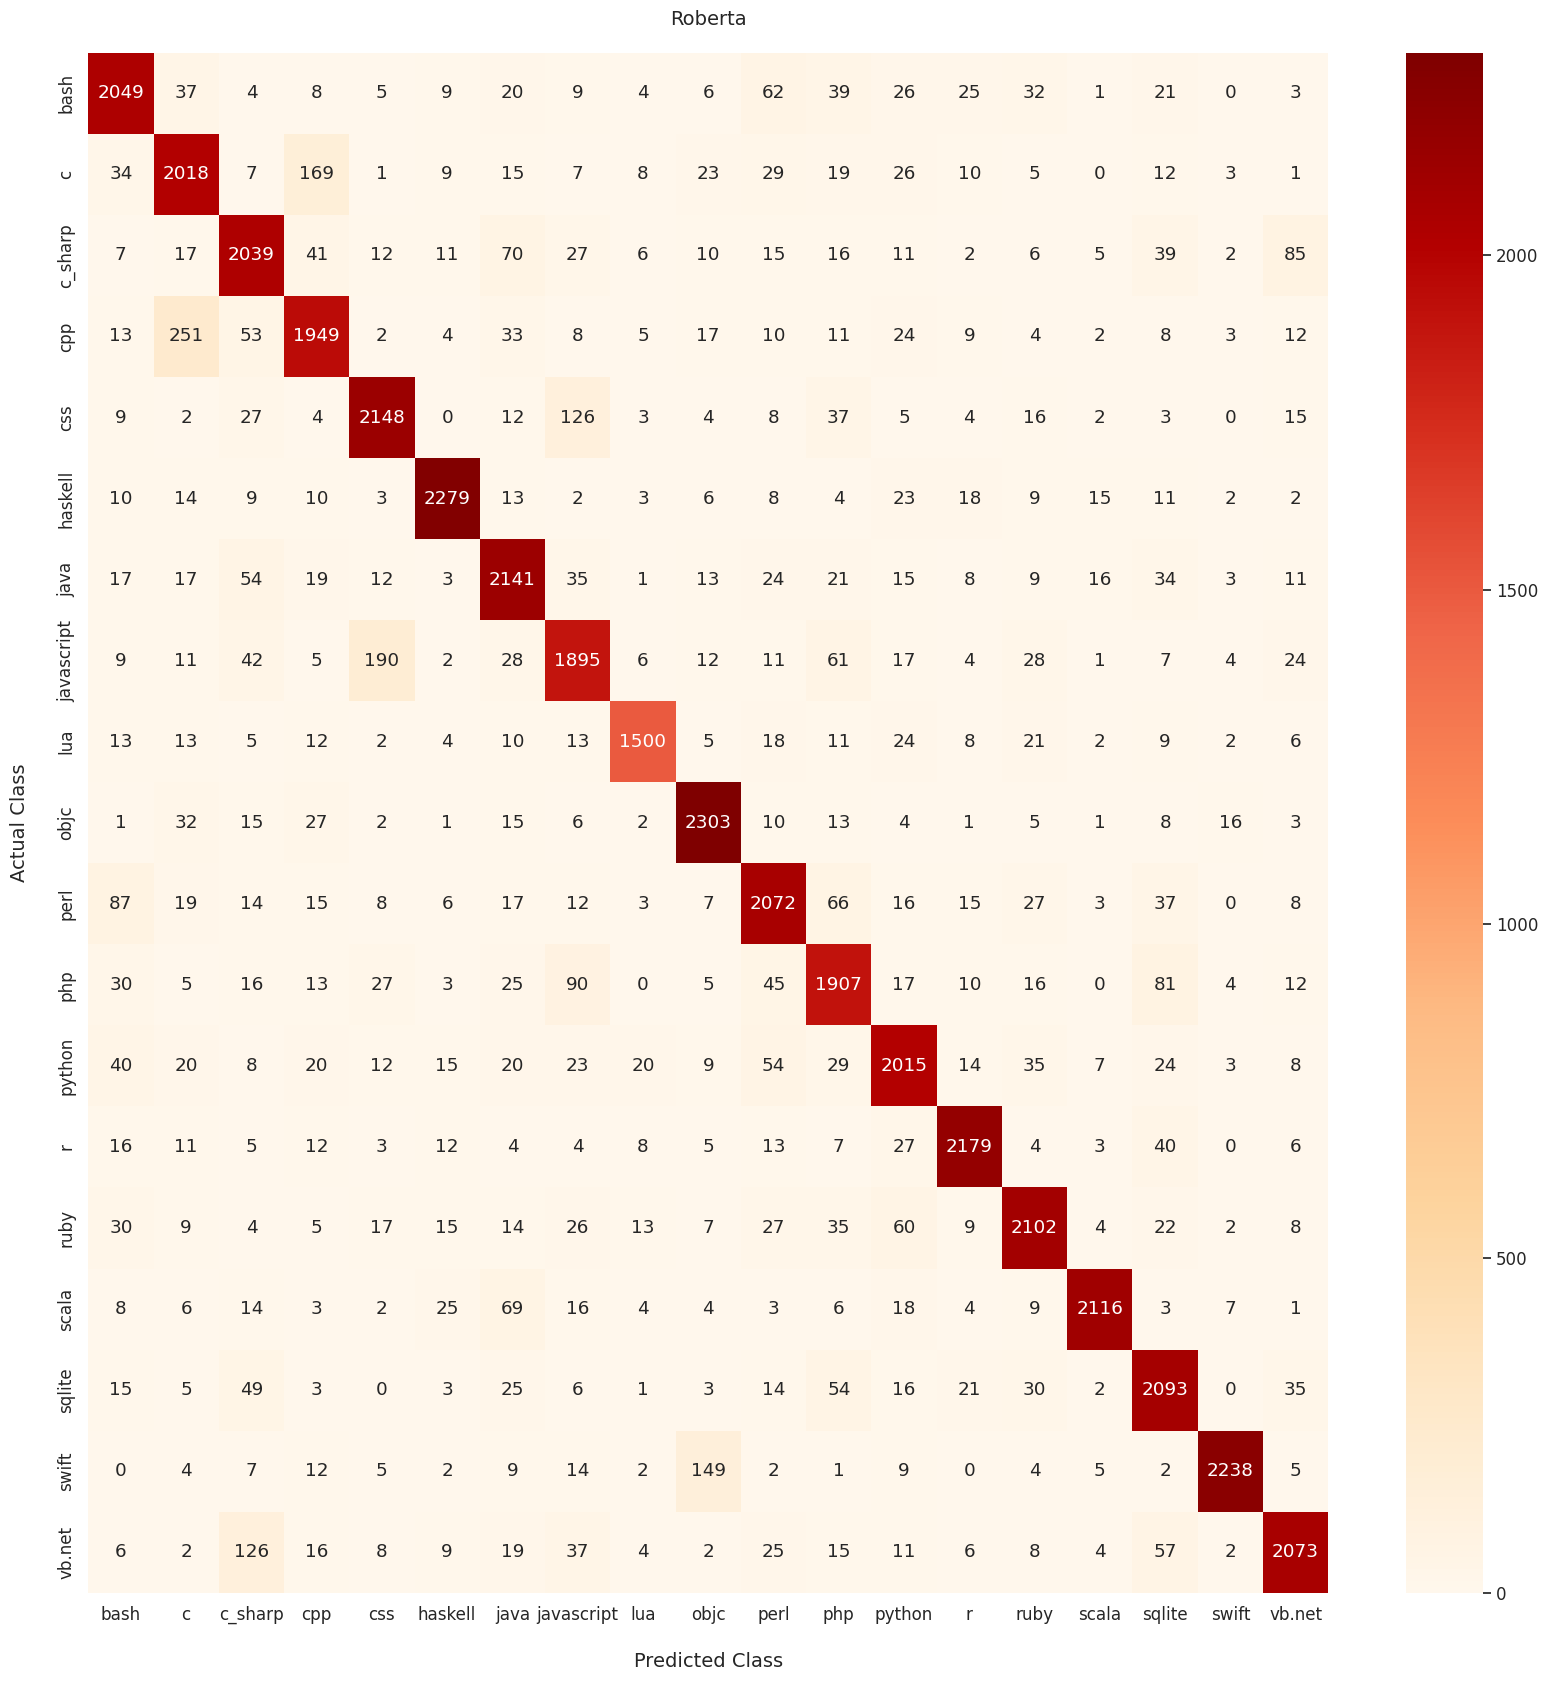

In [11]:
plot_confmat(confmat_roberta, 'Roberta')

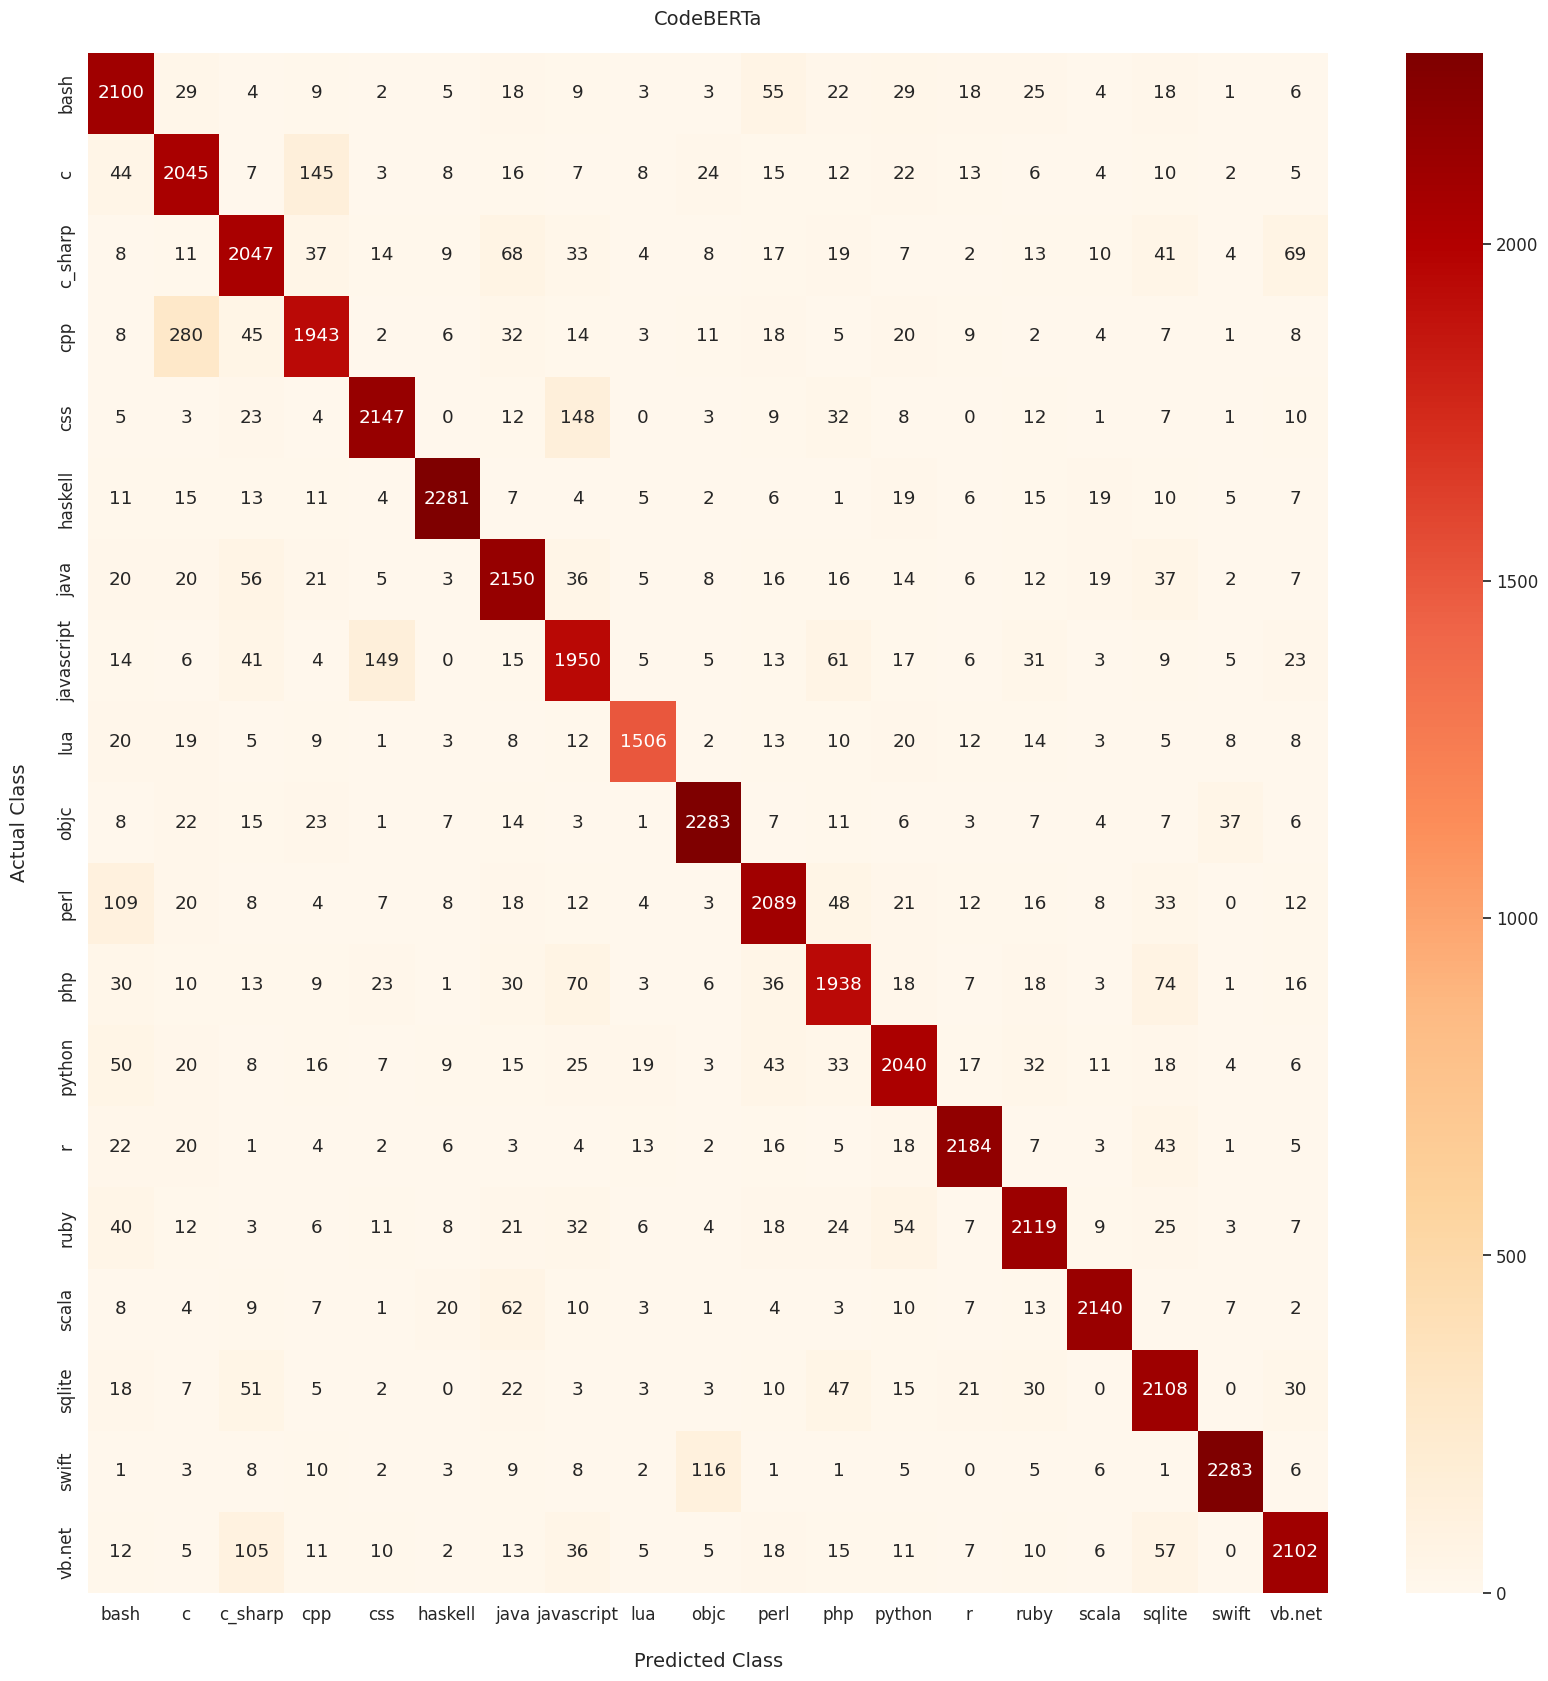

In [13]:
plot_confmat(confmat_codeberta, 'CodeBERTa')